In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
sns.set_style('whitegrid')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
raw_data = pd.read_csv('restaurantorders.csv')

In [3]:
raw_data.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


# Data Preprocessing

In [4]:
raw_data.describe(include='all')

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
count,74818.000000,74818,74818,74818.000000,74818.000000,74818.000000
unique,NaN,13081,248,NaN,NaN,NaN
top,NaN,05/05/2018 12:56,Pilau Rice,NaN,NaN,NaN
freq,NaN,60,4721,NaN,NaN,NaN
mean,9115.638162,NaN,NaN,1.243564,5.286492,6.931434
std,4052.210452,NaN,NaN,0.798207,3.338221,3.954832
min,630.000000,NaN,NaN,1.000000,0.500000,1.000000
25%,5590.000000,NaN,NaN,1.000000,2.950000,5.000000
50%,9103.000000,NaN,NaN,1.000000,3.950000,6.000000
75%,12630.000000,NaN,NaN,1.000000,8.950000,8.000000


In [5]:
raw_data.isnull()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
74813,False,False,False,False,False,False
74814,False,False,False,False,False,False
74815,False,False,False,False,False,False
74816,False,False,False,False,False,False


In [6]:
data=raw_data.drop(['Product Price','Order Date','Total products','Quantity'],axis=1)

In [7]:
data.describe(include='all')

,Order Number,Item Name
count,74818.000000,74818
unique,NaN,248
top,NaN,Pilau Rice
freq,NaN,4721
mean,9115.638162,NaN
std,4052.210452,NaN
min,630.000000,NaN
25%,5590.000000,NaN
50%,9103.000000,NaN
75%,12630.000000,NaN


In [8]:
#one hot encoding of data 
one_hot_encoded_data = pd.get_dummies(data, columns = ['Item Name'])
one_hot_encoded_data.head()
#For clarity
def rename_columns(col_name):
    return col_name.replace('Item Name_', '')
one_hot_encoded_data.rename(columns={col: rename_columns(col) for col in one_hot_encoded_data.columns}, inplace=True)
one_hot_encoded_data.head()


,Order Number,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,Bengal Fish Karahi,Bengal Fry Fish,Bengal King Prawn,Bengal Salad,...,Vegetable Rice,Vegetable Roll,Vegetable Samosa,Vindaloo,Vindaloo - Chicken,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
0,16118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#mergeing of rows through the order numbers
df_new1 =one_hot_encoded_data.groupby(['Order Number']).aggregate('sum')

df_new= df_new1.replace(to_replace= 2, value=1)
df_new= df_new.replace(to_replace= 4, value=1)
df_new= df_new.replace(to_replace= 3, value=1)
df_new.describe(include='all')

,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,Bengal Fish Karahi,Bengal Fry Fish,Bengal King Prawn,Bengal Salad,Bhindi Bhajee,...,Vegetable Rice,Vegetable Roll,Vegetable Samosa,Vindaloo,Vindaloo - Chicken,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
count,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,...,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,0.021199,0.045906,0.003284,0.014630,0.002836,0.001344,0.001717,0.007539,0.005150,0.017467,...,0.028887,0.021348,0.000821,0.018512,0.010226,0.001269,0.001717,0.004031,0.000746,0.006643
std,0.144052,0.209289,0.057217,0.120072,0.053185,0.036632,0.041400,0.086503,0.071584,0.131007,...,0.167495,0.144547,0.028644,0.134797,0.100610,0.035601,0.041400,0.063362,0.027312,0.081238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Apriory Algorithm

In [10]:
#Calculating the Support which is is the occurrence percent of the item/itemset or in simple terms popularity of item(s).

In [11]:
#Calcuation of Confidence It is the likelihood or trustworthiness of association rule or in simple terms

In [12]:
#Lift: It is nothing but a ratio of Confidence (of association rule) and Expected Confidence. 

In [13]:
item_count={}
for col in df_new.columns:
    item_count[col]=df_new[col].sum()

item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(20)

((248, 1),
                       frequency
 Pilau Rice                 4721
 Plain Naan                 3752
 Plain Papadum              3596
 Garlic Naan                2628
 Onion Bhajee               2401
 Plain Rice                 2369
 Chicken Tikka Masala       2133
 Mango Chutney              2069
 Bombay Aloo                1752
 Peshwari Naan              1535
 Mint Sauce                 1463
 Mushroom Rice              1452
 Keema Naan                 1362
 Saag Aloo                  1194
 Meat Samosa                1192
 Korma                      1172
 Chapati                    1170
 Onion Chutney              1032
 Butter Chicken              980
 Korma - Chicken             943)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

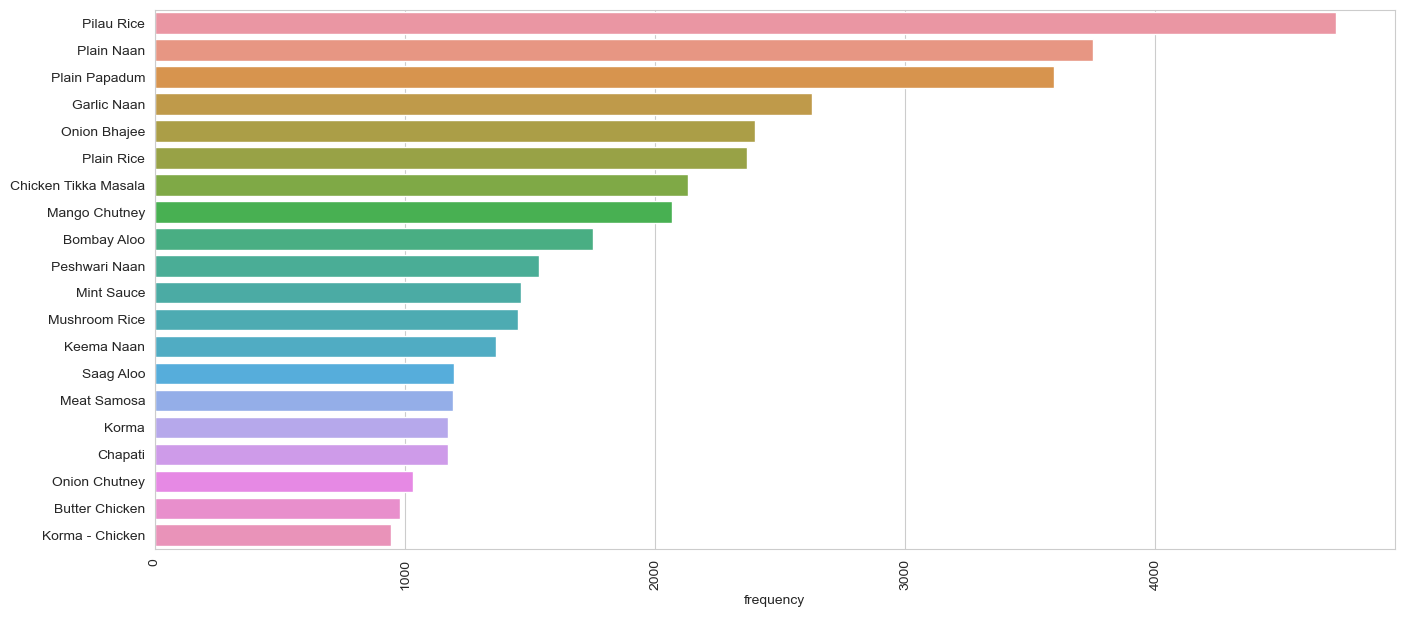

In [14]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:20], x=item_freq_df.frequency[:20])
plt.xticks(rotation=90)

In [15]:
apriori(df_new, min_support=0.05, use_colnames=True)

C:\Users\Amresh Gupta\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.130776,(Bombay Aloo)
1,0.073151,(Butter Chicken)
2,0.087333,(Chapati)
3,0.051653,(Chicken Tikka)
4,0.060088,(Chicken Tikka (Main))
5,0.159215,(Chicken Tikka Masala)
6,0.196163,(Garlic Naan)
7,0.101665,(Keema Naan)
8,0.087482,(Korma)
9,0.070389,(Korma - Chicken)


In [16]:
print(f'freq>200: {item_freq_df[item_freq_df.frequency>200].shape[0]} items')
print(f'freq>100: {item_freq_df[item_freq_df.frequency>100].shape[0]} items')
print(f'freq>50: {item_freq_df[item_freq_df.frequency>50].shape[0]} items')

freq>200: 82 items
freq>100: 130 items
freq>50: 180 items


In [17]:
pd.set_option('display.max_rows', 15)
freq_itemset_support = apriori(df_new, min_support=0.02, use_colnames=True)
freq_itemset_support

C:\Users\Amresh Gupta\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.021199,(Aloo Chaat)
1,0.045906,(Aloo Gobi)
2,0.034784,(Bhuna)
3,0.130776,(Bombay Aloo)
4,0.073151,(Butter Chicken)
...,...,...
199,0.023961,"(Plain Papadum, Peshwari Naan, Pilau Rice)"
200,0.046578,"(Plain Papadum, Pilau Rice, Plain Naan)"
201,0.023737,"(Plain Rice, Plain Papadum, Plain Naan)"
202,0.021049,"(Mint Sauce, Mango Chutney, Onion Chutney, Pla..."


In [18]:
overall_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.2)
overall_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bombay Aloo),(Chicken Tikka Masala),0.130776,0.159215,0.031126,0.238014,1.494922,0.010305,1.103413,0.380879
1,(Bombay Aloo),(Garlic Naan),0.130776,0.196163,0.026872,0.205479,1.047492,0.001218,1.011725,0.052160
2,(Keema Naan),(Bombay Aloo),0.101665,0.130776,0.020751,0.204112,1.560778,0.007456,1.092144,0.399955
3,(Bombay Aloo),(Mango Chutney),0.130776,0.154438,0.030380,0.232306,1.504206,0.010183,1.101432,0.385628
4,(Bombay Aloo),(Onion Bhajee),0.130776,0.179219,0.030380,0.232306,1.296211,0.006942,1.069151,0.262902
...,...,...,...,...,...,...,...,...,...,...
267,"(Mint Sauce, Plain Papadum)","(Mango Chutney, Pilau Rice)",0.080839,0.073524,0.023214,0.287165,3.905739,0.017271,1.299707,0.809397
268,"(Mint Sauce, Pilau Rice)","(Mango Chutney, Plain Papadum)",0.046428,0.113010,0.023214,0.500000,4.424373,0.017967,1.773979,0.811663
269,"(Mango Chutney, Plain Papadum)","(Mint Sauce, Pilau Rice)",0.113010,0.046428,0.023214,0.205416,4.424373,0.017967,1.200089,0.872591
270,"(Mango Chutney, Pilau Rice)","(Mint Sauce, Plain Papadum)",0.073524,0.080839,0.023214,0.315736,3.905739,0.017271,1.343284,0.803007


In [19]:
overall_association_rules.sort_values('confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
252,"(Mint Sauce, Mango Chutney, Onion Chutney)",(Plain Papadum),0.022617,0.268418,0.021049,0.930693,3.467323,0.014979,10.555679,0.728060
263,"(Mint Sauce, Mango Chutney, Pilau Rice)",(Plain Papadum),0.025752,0.268418,0.023214,0.901449,3.358375,0.016302,7.423403,0.720799
212,"(Mint Sauce, Onion Chutney)",(Plain Papadum),0.035829,0.268418,0.031126,0.868750,3.236553,0.021509,5.573956,0.716708
168,"(Mint Sauce, Mango Chutney)",(Plain Papadum),0.053743,0.268418,0.046503,0.865278,3.223617,0.032077,5.430297,0.728967
226,"(Mint Sauce, Red Sauce)",(Plain Papadum),0.026797,0.268418,0.023140,0.863510,3.217030,0.015947,5.359956,0.708130
...,...,...,...,...,...,...,...,...,...,...
121,(Bombay Aloo),"(Pilau Rice, Plain Naan)",0.130776,0.129133,0.026722,0.204338,1.582379,0.009835,1.094518,0.423412
2,(Keema Naan),(Bombay Aloo),0.101665,0.130776,0.020751,0.204112,1.560778,0.007456,1.092144,0.399955
211,(Mint Sauce),"(Onion Bhajee, Plain Papadum)",0.109204,0.066433,0.022020,0.201640,3.035255,0.014765,1.169357,0.752740
34,(Plain Rice),(Chicken Tikka Masala),0.176831,0.159215,0.035530,0.200929,1.261998,0.007376,1.052203,0.252203


In [20]:
product_correlations = {}

for _, row in overall_association_rules.iterrows():
    product_a = frozenset(row['antecedents'])
    product_b = frozenset(row['consequents'])
    lift = row['lift']
    support = row['support']
    product_correlations.setdefault(product_a, []).append((product_b, lift, support))

In [21]:
print(product_correlations)

{frozenset({'Bombay Aloo'}): [(frozenset({'Chicken Tikka Masala'}), 1.4949224193848782, 0.031126371575725908), (frozenset({'Garlic Naan'}), 1.047491712016013, 0.026871687691274165), (frozenset({'Mango Chutney'}), 1.5042061989225597, 0.030379935806523848), (frozenset({'Onion Bhajee'}), 1.2962110060686283, 0.030379935806523848), (frozenset({'Pilau Rice'}), 1.4172534019280412, 0.06531312980518027), (frozenset({'Plain Naan'}), 1.296187238952011, 0.04747331492125103), (frozenset({'Plain Papadum'}), 1.1823023806258601, 0.041501828767634544), (frozenset({'Plain Rice'}), 1.1846074485699032, 0.02739419272971561), (frozenset({'Pilau Rice', 'Plain Naan'}), 1.582378520336791, 0.026722400537433754)], frozenset({'Keema Naan'}): [(frozenset({'Bombay Aloo'}), 1.5607780325736393, 0.020750914383817272), (frozenset({'Onion Bhajee'}), 1.3191499381376215, 0.024035231768306336), (frozenset({'Pilau Rice'}), 1.2792776736305835, 0.04583115622900649), (frozenset({'Plain Naan'}), 0.734050014245951, 0.02090020153

In [22]:
def get_recommendations(product):
    if product in product_correlations:
        
        # Sort the recommendations by a combination of lift and support
        recommendations = sorted(product_correlations[product], key=lambda x: (x[1]+ x[2]), reverse=True)
        return recommendations[:6]
    else:
        return []

In [27]:
input_product = frozenset({'Chicken Tikka Masala'})
recommendations = get_recommendations(input_product)

if recommendations:
    print(f"All recommended product combinations for {input_product}:")
    for rec in recommendations:
        product_b, lift, support = rec
        print(f"Product Combination: {product_b}, Lift: {lift}, Support: {support}")
else:
    print(f"No recommendations found for {input_product}.")

All recommended product combinations for frozenset({'Chicken Tikka Masala'}):
Product Combination: frozenset({'Pilau Rice', 'Plain Naan'}), Lift: 1.9604887685666206, Support: 0.04030753153691125
Product Combination: frozenset({'Pilau Rice', 'Plain Papadum'}), Lift: 1.738222752767305, Support: 0.036873926998581774
Product Combination: frozenset({'Pilau Rice'}), Lift: 1.5166576248625483, Support: 0.08509367768903486
Product Combination: frozenset({'Plain Naan'}), Lift: 1.4446567394092429, Support: 0.06441740688213779
Product Combination: frozenset({'Plain Papadum'}), Lift: 1.4007846922689013, Support: 0.059864148690005226
Product Combination: frozenset({'Mango Chutney'}), Lift: 1.3812351056846348, Support: 0.03396282749869374


In [28]:
if recommendations:
    print(f"Top three recommended product combinations for {input_product}:")
    for i, rec in enumerate(recommendations):
        product_b, lift, support = rec
        print(f"{i + 1}. Product Combination: {product_b}, Lift: {lift}, Support: {support}")
else:
    print(f"No recommendations found for {input_product}.")

Top three recommended product combinations for frozenset({'Chicken Tikka Masala'}):
1. Product Combination: frozenset({'Pilau Rice', 'Plain Naan'}), Lift: 1.9604887685666206, Support: 0.04030753153691125
2. Product Combination: frozenset({'Pilau Rice', 'Plain Papadum'}), Lift: 1.738222752767305, Support: 0.036873926998581774
3. Product Combination: frozenset({'Pilau Rice'}), Lift: 1.5166576248625483, Support: 0.08509367768903486
4. Product Combination: frozenset({'Plain Naan'}), Lift: 1.4446567394092429, Support: 0.06441740688213779
5. Product Combination: frozenset({'Plain Papadum'}), Lift: 1.4007846922689013, Support: 0.059864148690005226
6. Product Combination: frozenset({'Mango Chutney'}), Lift: 1.3812351056846348, Support: 0.03396282749869374


In [25]:
import pickle 
pickle.dump(apriori,open('Combo_Recomm.pkl','wb'))
